## Phase 2 Project Submission

Please fill out:
* Student name: Connor Anastasio
* Student pace: self paced 
* Scheduled project review date/time: 1/10/25 @ 3:00pm
* Instructor name: Brandon Collins
* Blog post URL: https://dev.to/connoranastasio/the-birthday-paradox-a-statistical-breakdown-and-how-it-relates-to-online-security-52ac


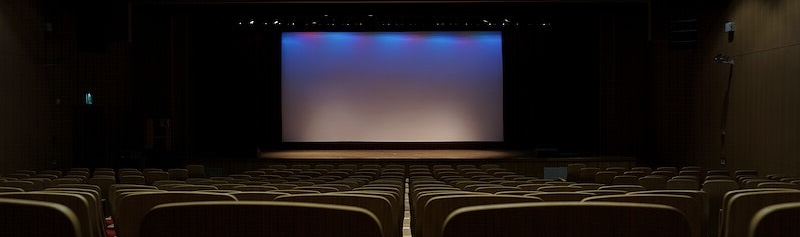


# Blockbusters at the Box Office: Investment Analysis

## Overview

This project focuses on generating statistical insights for movies. Here we are advising a brand new movie studio on how they can begin generating profit. Our analysis will examine movie genres, distribution areas, runtimes, ratings, and budgets to make informed suggestions on what is most likely to succeed.

## Business Problem

Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

## Data Understanding

Our analysis will focus on certain aspects of movies by utilizing data from various sources:

**IMDB:** user ratings and movie genres (data/im.db) <br>
**Rotten Tomatoes:** runtime information (data/rt.movie_info.tsv) <br>
**The Numbers:** movie budgets (data/tn.movie_budgets.csv) <br>

We will use these data to gain insight into the following questions:

*__"Which genres are the highest rated?"__* <br>
*__"How important is a worldwide release for revenue compared to only domestic?"__* <br>
*__"Is there a relationship between movie length and revenue?"__* <br>

## Data Preparation

Let's begin by setting up what we will need for our analysis.

In [1]:
#import our libraries and modules
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import figure
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

# set float to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Data Cleaning

#### Rotten Tomatoes Dataset

In [2]:
movie_info_df = pd.read_csv('data/rt.movie_info.tsv', sep='\t')
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


We only need the "box_office", "genre" and "runtime" columns from this dataset. Let's clean those up and drop the others.

In [3]:
#make a copy of our dataframe for cleaning
movie_info_df_copy = movie_info_df.copy()
runtime_df = movie_info_df_copy
runtime_df


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [4]:
# drop unnecessary columns; ignore errors if code is re-run
runtime_df.drop(['synopsis', 'rating', 'writer', 'theater_date', 'dvd_date', 'currency', 'id', 'studio', 'director'], 
                axis=1, inplace=True, errors='ignore')

# drop null values from box office, genre, runtime columns
runtime_df.dropna(subset=['box_office'], inplace=True)
runtime_df.dropna(subset=['runtime'], inplace=True)
runtime_df.dropna(subset=['genre'], inplace=True)

# strip 'minutes' from rows in runtime
runtime_df['runtime']= runtime_df['runtime'].str.strip(' minutes')
runtime_df['runtime'] = (runtime_df['runtime'].astype(int))

#remove commas from box_office and convert to float
runtime_df["box_office"] = runtime_df["box_office"].str.replace(',', '')
runtime_df

,genre,box_office,runtime
1,Drama|Science Fiction and Fantasy,600000,108
6,Comedy,41032915,82
7,Drama,224114,123
8,Drama,134904,117
15,Comedy|Drama|Mystery and Suspense,1039869,108
...,...,...,...
1541,Action and Adventure|Science Fiction and Fantasy,25335935,119
1542,Comedy|Drama,1416189,129
1545,Horror|Mystery and Suspense,59371,98
1546,Art House and International|Comedy|Drama,794306,97


#### Movie Budgets

In [5]:
budgets_df = pd.read_csv('data/tn.movie_budgets.csv')
budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


Let's drop "release_date" and reformat the budget and gross columns.

In [6]:
# Drop release_date column

cleaned_budgets_df = budgets_df.drop(columns=['release_date'])
cleaned_budgets_df

,id,movie,production_budget,domestic_gross,worldwide_gross
0,1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
5777,78,Red 11,"$7,000",$0,$0
5778,79,Following,"$6,000","$48,482","$240,495"
5779,80,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,A Plague So Pleasant,"$1,400",$0,$0


In [7]:
# Remove currency signs and commas from row entries; cast the columns as integers
cleaned_budgets_df['domestic_gross'] = cleaned_budgets_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(int)

cleaned_budgets_df['worldwide_gross'] = cleaned_budgets_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(int)

cleaned_budgets_df['production_budget'] = cleaned_budgets_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(int)

In [8]:
#sort largest gross is shown first
cleaned_budgets_df.sort_values('worldwide_gross', ascending=False)

cleaned_budgets_df

,id,movie,production_budget,domestic_gross,worldwide_gross
0,1,Avatar,425000000,760507625,2776345279
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,Dark Phoenix,350000000,42762350,149762350
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...
5777,78,Red 11,7000,0,0
5778,79,Following,6000,48482,240495
5779,80,Return to the Land of Wonders,5000,1338,1338
5780,81,A Plague So Pleasant,1400,0,0


#### IMDB database

Since im.db is a .db (SQL relational database) file, we will be using pandas and sqlite3 to work with it. Let's first create a connection:

In [9]:
# Load the SQLite database
db_path = 'data/im.db'
conn = sqlite3.connect(db_path)
curr = conn.cursor

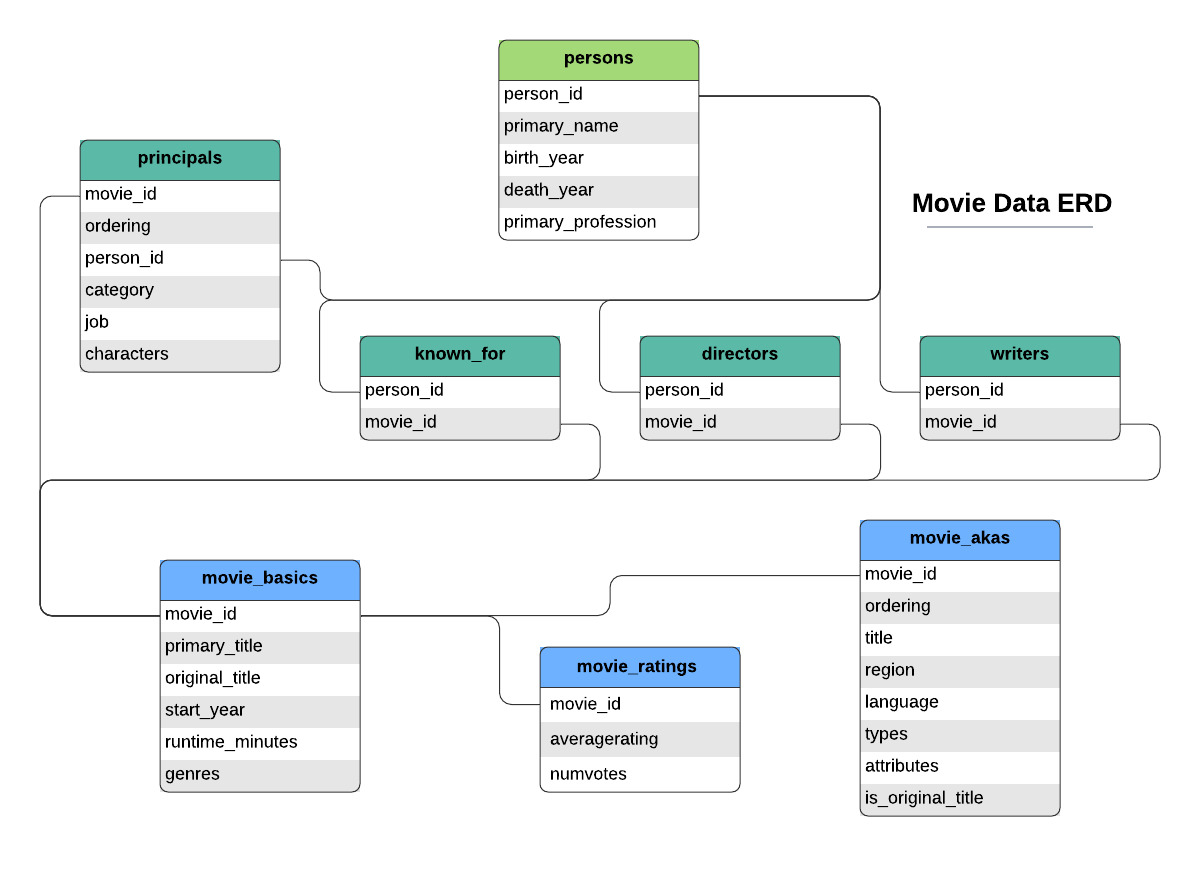


The tables we will be focusing on are movie_basics and movie_ratings. Let's explore them now and clean as needed so they are ready to be joined later.

In [10]:
#examine movie_basics
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics;", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


In [11]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [12]:
# examine movie_ratings
ratings_df = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)

ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


In [13]:
ratings_df.describe()

,averagerating,numvotes
count,73856.00,73856.00
mean,6.33,3523.66
std,1.47,30294.02
min,1.00,5.00
25%,5.50,14.00
50%,6.50,49.00
75%,7.40,282.00
max,10.00,1841066.00


### Data Engineering

#### Budgets

Let's add two columns to our budgets dataframe for net profit from domestic and worldwide gross, respectively:

In [14]:
#Create net profit columns to show domestic and worldwide net profits
cleaned_budgets_df['domestic_profit'] = cleaned_budgets_df['domestic_gross'] - cleaned_budgets_df['production_budget']
cleaned_budgets_df['worldwide_profit'] = cleaned_budgets_df['worldwide_gross'] - cleaned_budgets_df['production_budget']

#Keep in Descending order
cleaned_budgets_df.sort_values('worldwide_profit', ascending=False)

,id,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
0,1,Avatar,425000000,760507625,2776345279,335507625,2351345279
42,43,Titanic,200000000,659363944,2208208395,459363944,2008208395
6,7,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200
5,6,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220
33,34,Jurassic World,215000000,652270625,1648854864,437270625,1433854864
...,...,...,...,...,...,...,...
352,53,Town & Country,105000000,6712451,10364769,-98287549,-94635231
341,42,Men in Black: International,110000000,3100000,3100000,-106900000,-106900000
193,94,Mars Needs Moms,150000000,21392758,39549758,-128607242,-110450242
194,95,Moonfall,150000000,0,0,-150000000,-150000000


#### SQL Database: Genres and Ratings Join

Let's join the "movie_basics" and "movie_ratings" on their shared primary key "movie_id" to create a new dataframe to work with:

In [15]:
#joining movie_basics table that contains movie_id and genres and the movie_ratings table to 
ratings_genres = pd.read_sql("""
    SELECT mb.movie_id AS Movie_ID,
    mb.primary_title AS Title, 
    mb.start_year AS Year, 
    mb.genres AS Genre, 
    mr.averagerating AS Rating, 
    mr.numvotes AS Votes
        FROM movie_basics AS mb
            JOIN movie_ratings AS mr
                 ON mb.movie_id = mr.movie_id
""", conn)

#Ensure "Rating" column is numeric
ratings_genres['Rating'] = pd.to_numeric(ratings_genres['Rating'], errors='coerce')
ratings_genres

,Movie_ID,Title,Year,Genre,Rating,Votes
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.00,77
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.20,43
2,tt0069049,The Other Side of the Wind,2018,Drama,6.90,4517
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.10,13
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.50,119
...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,2019,Documentary,6.20,6
73852,tt9914286,Sokagin Çocuklari,2019,"Drama,Family",8.70,136
73853,tt9914642,Albatross,2017,Documentary,8.50,8
73854,tt9914942,La vida sense la Sara Amat,2019,None,6.60,5


In [16]:
ratings_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Movie_ID  73856 non-null  object 
 1   Title     73856 non-null  object 
 2   Year      73856 non-null  int64  
 3   Genre     73052 non-null  object 
 4   Rating    73856 non-null  float64
 5   Votes     73856 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.4+ MB


It looks like there are some nulls in Genre. Let's drop them as there are relatively few:

In [17]:
ratings_genres.isna().sum()

Movie_ID      0
Title         0
Year          0
Genre       804
Rating        0
Votes         0
dtype: int64

In [18]:
#Drop null Genre values
ratings_genres = ratings_genres.dropna(subset=['Genre'])

ratings_genres.isna().sum()

Movie_ID    0
Title       0
Year        0
Genre       0
Rating      0
Votes       0
dtype: int64

In [19]:
#Confirm Years are all in range 2010-2019
ratings_genres.groupby('Year').count()

,Movie_ID,Title,Genre,Rating,Votes
Year,,,,,
2010,6701,6701,6701,6701,6701
2011,7274,7274,7274,7274,7274
2012,7602,7602,7602,7602,7602
2013,7905,7905,7905,7905,7905
2014,8269,8269,8269,8269,8269
2015,8405,8405,8405,8405,8405
2016,8613,8613,8613,8613,8613
2017,8638,8638,8638,8638,8638
2018,7476,7476,7476,7476,7476


In [20]:
#let's convert year back to a string
ratings_genres.loc[:, 'Year'] = ratings_genres['Year'].astype(str)

Many movies have multiple genres, but the number of genres is inconsistent throughout. We also don't want to weigh one genre more than the others per movie. One approach to handling this is use .explode(); this will allow us to count each of a movie's genres separately. Unfortunately this will count individual movies multiple times, but it is a useful tradeoff for having a more accurate view of genre ratings.

In [21]:
ratings_genres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73052 entries, 0 to 73855
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Movie_ID  73052 non-null  object 
 1   Title     73052 non-null  object 
 2   Year      73052 non-null  object 
 3   Genre     73052 non-null  object 
 4   Rating    73052 non-null  float64
 5   Votes     73052 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 3.9+ MB


In [22]:
#convert column to string
ratings_genres.loc[:, 'Genre'] = ratings_genres['Genre'].astype(str)

# split column into lists
ratings_genres.loc[:, 'Genre'] = ratings_genres['Genre'].str.split(',')

# .explode() creates new rows for each genre
ratings_genres_exploded = ratings_genres.explode('Genre')

ratings_genres_exploded

,Movie_ID,Title,Year,Genre,Rating,Votes
0,tt0063540,Sunghursh,2013,Action,7.00,77
0,tt0063540,Sunghursh,2013,Crime,7.00,77
0,tt0063540,Sunghursh,2013,Drama,7.00,77
1,tt0066787,One Day Before the Rainy Season,2019,Biography,7.20,43
1,tt0066787,One Day Before the Rainy Season,2019,Drama,7.20,43
...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,2019,Documentary,6.20,6
73852,tt9914286,Sokagin Çocuklari,2019,Drama,8.70,136
73852,tt9914286,Sokagin Çocuklari,2019,Family,8.70,136
73853,tt9914642,Albatross,2017,Documentary,8.50,8


In [23]:
print(ratings_genres_exploded.dtypes)

Movie_ID     object
Title        object
Year         object
Genre        object
Rating      float64
Votes         int64
dtype: object


In [24]:
# Converting the 'Rating' column  to a numeric data type using the 'pd.to_numeric()' function for the conversion.
# The 'errors='coerce'' argument ensures that any values in the 'Rating' column that cannot be converted to numeric types

#ratings_genres_exploded['Rating'] = pd.to_numeric(ratings_genres['ratings_genres_exploded'], errors='coerce')


In [25]:
# groupby Genre and show mean Genre score for entries. sort genres by average rating
avg_rating = ratings_genres_exploded.groupby('Genre').agg({'Rating': 'mean'}).sort_values(by='Rating', ascending=False)
avg_rating



,Rating
Genre,
Short,8.80
Documentary,7.33
Game-Show,7.30
News,7.27
Biography,7.16
Music,7.09
History,7.04
Sport,6.96
War,6.58


In [26]:
#let's look at number of movies per genre
genre_count = ratings_genres_exploded.groupby('Genre')['Movie_ID'].count()
avg_rating['count'] = genre_count
avg_rating

,Rating,count
Genre,,
Short,8.80,1
Documentary,7.33,17753
Game-Show,7.30,2
News,7.27,579
Biography,7.16,3809
Music,7.09,1968
History,7.04,2825
Sport,6.96,1179
War,6.58,853


We should limit this to genres with at least 150 movie representations to have a more useful analysis.

In [27]:
#ignore genres with < 150 movies

avg_rating_150 = avg_rating.loc[avg_rating['count'] > 150].sort_values(by='Rating', ascending=False)
avg_rating_150

,Rating,count
Genre,,
Documentary,7.33,17753
News,7.27,579
Biography,7.16,3809
Music,7.09,1968
History,7.04,2825
Sport,6.96,1179
War,6.58,853
Musical,6.50,721
Drama,6.40,30788


#### Runtimes and profits

Let's look at runtimes and compare them to profits

In [28]:
runtime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 1 to 1555
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   genre       338 non-null    object
 1   box_office  338 non-null    object
 2   runtime     338 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 10.6+ KB


In [29]:
runtime_df

,genre,box_office,runtime
1,Drama|Science Fiction and Fantasy,600000,108
6,Comedy,41032915,82
7,Drama,224114,123
8,Drama,134904,117
15,Comedy|Drama|Mystery and Suspense,1039869,108
...,...,...,...
1541,Action and Adventure|Science Fiction and Fantasy,25335935,119
1542,Comedy|Drama,1416189,129
1545,Horror|Mystery and Suspense,59371,98
1546,Art House and International|Comedy|Drama,794306,97


## Results

### Most Popular Genres

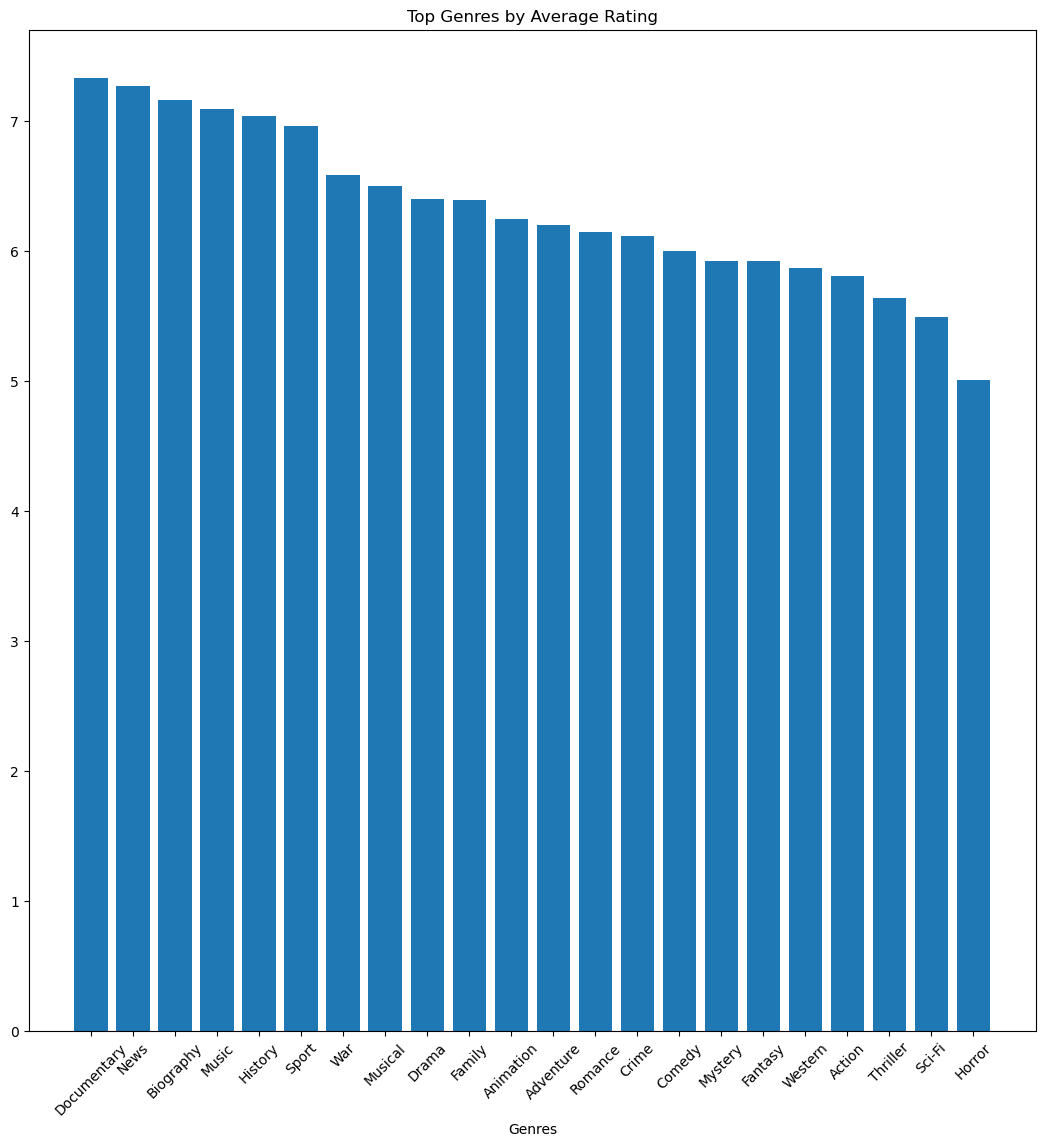

In [30]:
figure, ax = plt.subplots(figsize=(13, 13))
ax.bar(x = avg_rating_150.index , height = avg_rating_150['Rating'],)
ax.set_title('Top Genres by Average Rating')
ax.set_xlabel('Genres')

plt.xticks(rotation = 45 )

plt.savefig('images/top_genres.png', dpi=300);

We can see here that the top genres are: Documentary, News, Biography, Music, and History. Making content that falls into these categories will be more likely to be well received.

### Worldwide Releases are Important

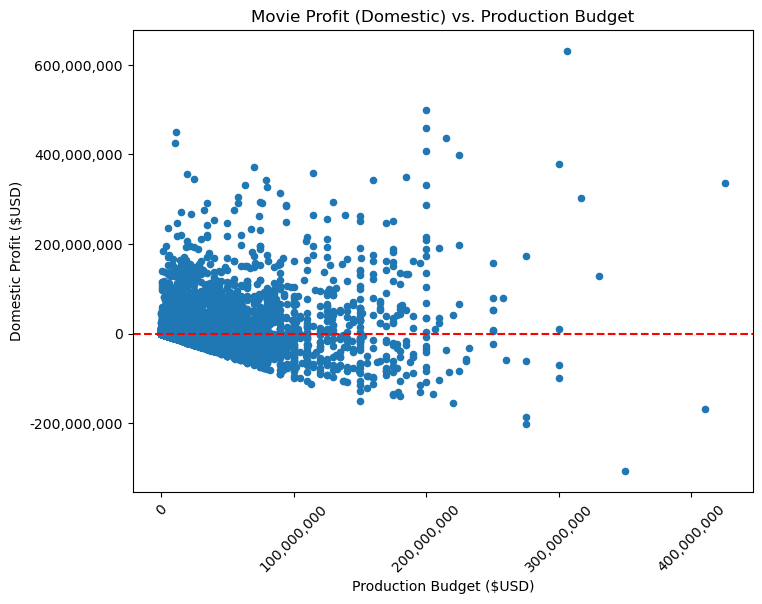

In [31]:
#Plot Domestic Profit vs Production Budget
cleaned_budgets_df.plot(x='production_budget', y='domestic_profit', kind='scatter', figsize=(8,6))

plt.xticks(rotation=45)

plt.xlabel('Production Budget ($USD)')
plt.ylabel('Domestic Profit ($USD)')
plt.title('Movie Profit (Domestic) vs. Production Budget')

plt.ticklabel_format(style='plain', axis='both', useMathText=True)
plt.axhline(y=0, color='red', linestyle='--')

plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

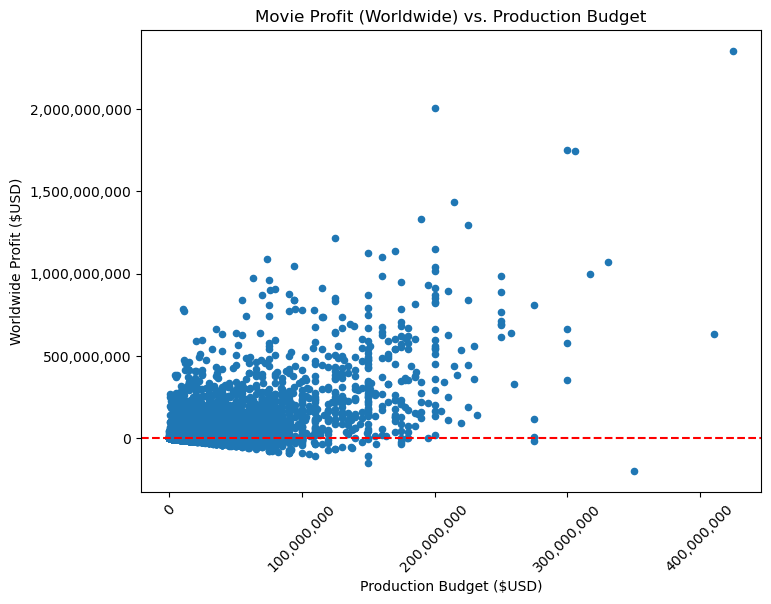

In [32]:
#Plot Worldwide Profit vs Production Budget
cleaned_budgets_df.plot(x='production_budget', y='worldwide_profit', kind='scatter', figsize=(8,6))

plt.xticks(rotation=45)

plt.xlabel('Production Budget ($USD)')
plt.ylabel('Worldwide Profit ($USD)')
plt.title('Movie Profit (Worldwide) vs. Production Budget')

plt.ticklabel_format(style='plain', axis='both', useMathText=True)
plt.axhline(y=0, color='red', linestyle='--')

plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

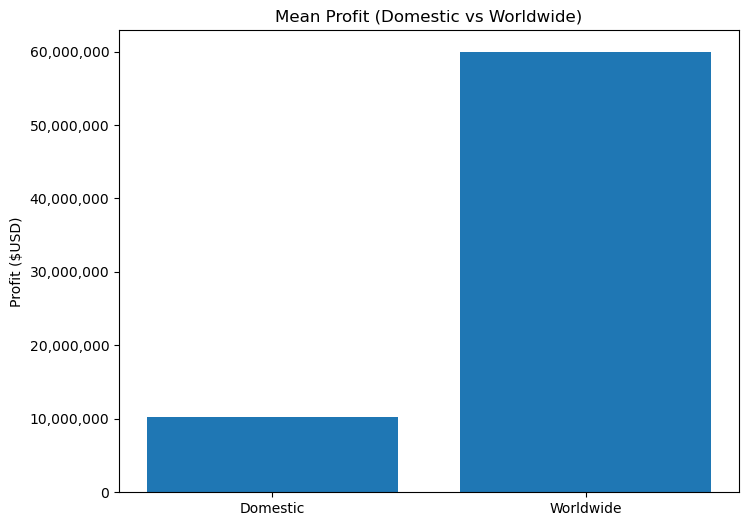

In [33]:
#calculate mean domestic and worldwide profits
mean_domestic = cleaned_budgets_df['domestic_profit'].mean()
mean_worldwide = cleaned_budgets_df['worldwide_profit'].mean()

fig, ax = plt.subplots(figsize=(8, 6))

# Plot Average profit 
ax.bar(['Domestic', 'Worldwide'], [mean_domestic, mean_worldwide])

# Set the title and labels
ax.set_title('Mean Profit (Domestic vs Worldwide)')
ax.set_ylabel('Profit ($USD)')

# Format the y-axis to show full numbers
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

From these modelings, it is clear that worldwide releases are imperative to maximize profit and have a higher chance of continued success.

### Runtime: Not too short, not too long

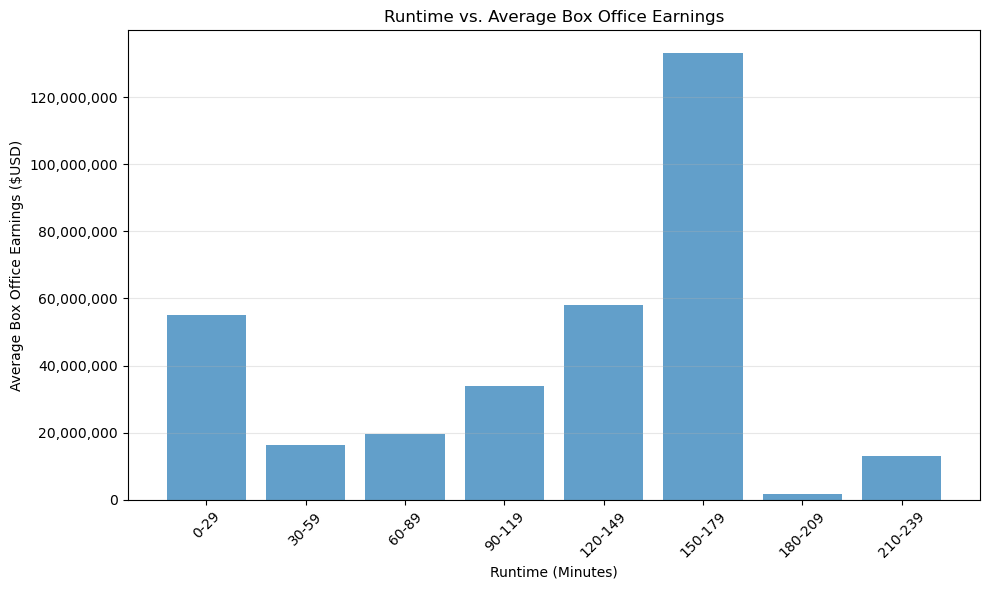

In [34]:
# Convert 'box_office' to numeric
runtime_df['box_office'] = pd.to_numeric(runtime_df['box_office'], errors='coerce')

# Bin the runtime into chunks of 30 minutes
bins_30 = range(0, runtime_df['runtime'].max() + 30, 30)
labels_30 = [f"{b}-{b+29}" for b in bins_30[:-1]]
runtime_df['runtime_bin_30'] = pd.cut(runtime_df['runtime'], bins=bins_30, labels=labels_30, right=False)

# Aggregate box office profits by 30-minute bins
runtime_boxoffice_30 = runtime_df.groupby('runtime_bin_30', observed=False)['box_office'].mean().reset_index()

# Bar graph of runtime in 30 minute bins vs box office profits
plt.figure(figsize=(10, 6))
plt.bar(runtime_boxoffice_30['runtime_bin_30'], runtime_boxoffice_30['box_office'], alpha=0.7)
plt.title('Runtime vs. Average Box Office Earnings')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Average Box Office Earnings ($USD)')
plt.xticks(rotation=45)

# Format the y-axis to show full numbers
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

It appears that movies with a runtime between 2.5 and 3 hours earn significantly more at the Box Office than movies with other runtimes.

## Conclusion

The highest rated genres are Documentary, News, Biography, Music, and History, followed by Sport, War, Musical, Drama, and Family. Based on our analysis, we recommend these as projects for consideration.

Worldwide releases are crucial to our bottom line. Movies released eworldwide earn on averqge $50MM more than those only released domestically. Making content geared towards a worldwide release and inclusive of international markets should be a top priority.

We should focus on "shorts" of less than 30 minutes in length and movies between 2-3hrs in length, as these lengths have been shown to average the highest returns.

## Next Steps
While Genre is a good measure of reception, it doesn't necessarily equate to profit. It is possible that movies with terrible ratings gross highly, but we did not have enough information to examine this. Additionally, it could be useful to look at movies from before 2010 to see if there are any trends in which genres are most popular throughout history. I am also unsure if the budgets were adjusted for inflation, but this may not be an issue because of the recency of the years involved.